# **Feature Selection Module - Quantile Transformer**

This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme. In this approach we use **uniform distribution**.

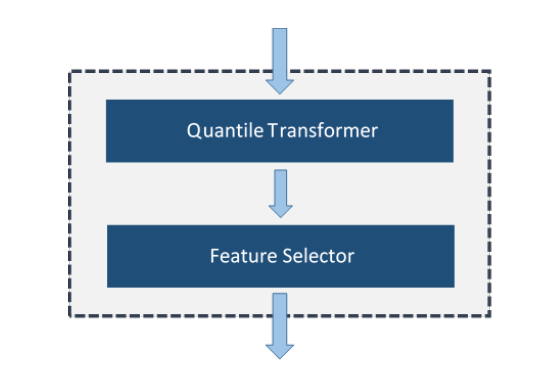

In [ ]:
# evaluate svm on the dataset with uniform quantile transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset
url = "/content/drive/MyDrive/ELOC-SW/features/features_original.csv"
dataset = read_csv(url)
# separate into input and output columns
X = dataset.drop(['feature_class'], axis=1)
y = dataset['feature_class']
X = X.values
y = y.values
# ensure inputs are floats 
X = X.astype('float32')
# define the pipeline
trans = QuantileTransformer(n_quantiles=100, output_distribution='uniform')
model = SVC()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
    # load dataset
    url = '/content/drive/MyDrive/ELOC-SW/features/features_original.csv'
    dataset = read_csv(url)
    data = dataset.values
    # separate into input and output columns
    X = dataset.drop(['feature_class'], axis=1)
    y = dataset['feature_class']
    X = X.values
    y = y.values
    # ensure inputs are floats
    X = X.astype('float32')
    return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(1,100):
		# define the pipeline
		trans = QuantileTransformer(n_quantiles=i, output_distribution='uniform')
		model = SVC()
		models[str(i)] = Pipeline(steps=[('t', trans), ('m', model)])
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results = list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(mean(scores))
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.plot(results)
pyplot.show()